In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("covid19_deaths_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
dataset.shape

(266, 104)

In [4]:
df = dataset.drop(["Lat", "Long"], axis= 1, inplace = True)

In [5]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
# aggregate the rows
corona_aggregated = dataset.groupby("Country/Region").sum()

In [7]:
corona_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [8]:
corona_aggregated.shape

(187, 101)

In [9]:
corona_aggregated.dtypes

Province/State    object
1/22/20            int64
1/23/20            int64
1/24/20            int64
1/25/20            int64
                   ...  
4/26/20            int64
4/27/20            int64
4/28/20            int64
4/29/20            int64
4/30/20            int64
Length: 101, dtype: object

In [10]:
corona_aggregated['Province/State'] = pd.to_numeric(corona_aggregated['Province/State'], errors='coerce')

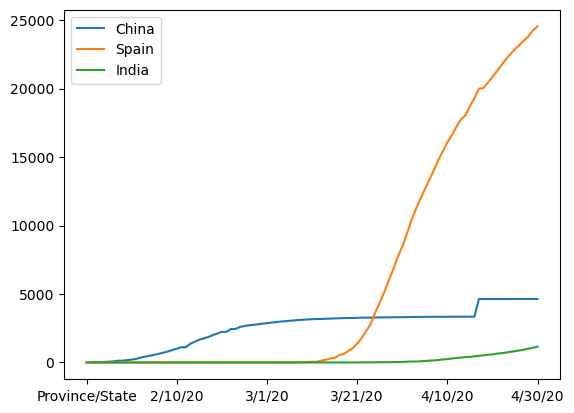

In [11]:
corona_aggregated.loc["China"].plot()
corona_aggregated.loc["Spain"].plot()
corona_aggregated.loc["India"].plot()
plt.legend()

<Axes: >

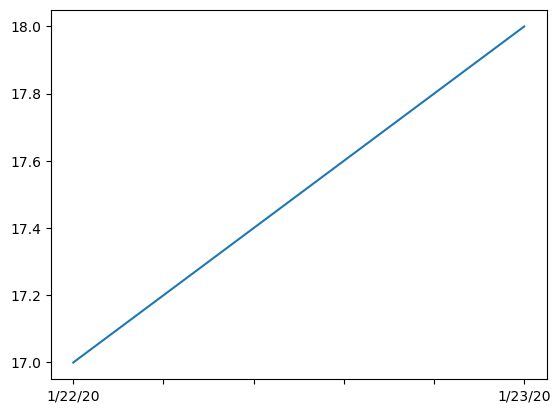

In [12]:
corona_aggregated.loc["China"][:3].plot()


<Axes: >

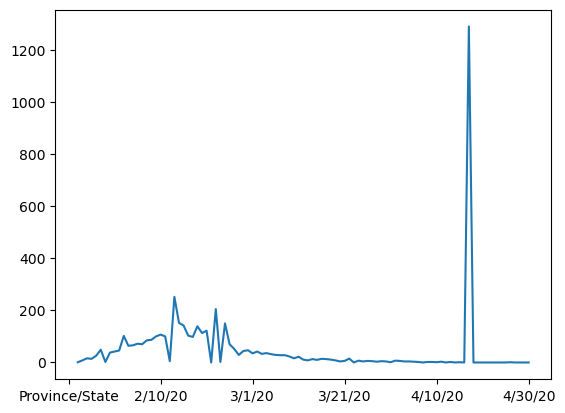

In [13]:
corona_aggregated.loc["China"].diff().plot()

In [14]:
#max infection rate
corona_aggregated.loc["China"].diff().max()

1290.0

In [15]:
corona_aggregated.loc["Spain"].diff().max()

961.0

In [16]:
corona_aggregated.loc["India"].diff().max()

75.0

In [17]:
countries = list(corona_aggregated.index)
max_infection_rates= []

for c in countries:
    max_infection_rates.append(corona_aggregated.loc[c].diff().max())
corona_aggregated["Max_infection_rates"]= max_infection_rates

In [18]:
corona_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0,0,0,0,0,0,0,0,0,...,4,4,4,2,2,2,2,2,2,1.0
Western Sahara,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Yemen,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.0


In [19]:
#create a new dataframe
corona_data = pd.DataFrame(corona_aggregated["Max_infection_rates"])

In [20]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


In [21]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [22]:
useless = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [23]:
happiness_report.drop(useless, axis=1, inplace= True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [24]:
happiness_report.set_index("Country or region", inplace= True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [25]:
corona_data.shape


(187, 1)

In [26]:
happiness_report.shape

(156, 4)

In [27]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,6.0,0.960,1.427,0.805,0.154
Vietnam,0.0,0.741,1.346,0.851,0.543
Yemen,2.0,0.287,1.163,0.463,0.143
Zambia,1.0,0.578,1.058,0.426,0.431


In [28]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


In [29]:
data["Max_infection_rates"] = data["Max_infection_rates"].replace(0, 1)

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

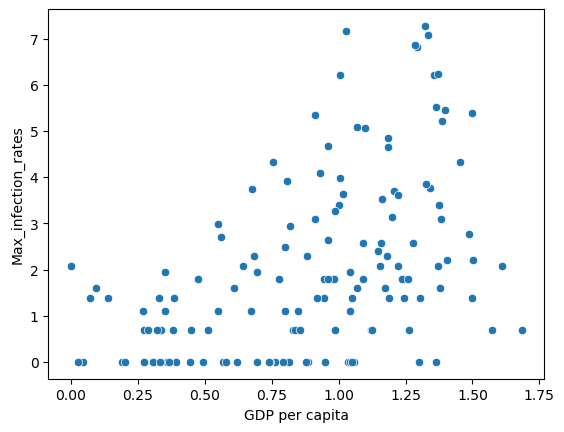

In [30]:
# Visualisation
x = data["GDP per capita"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

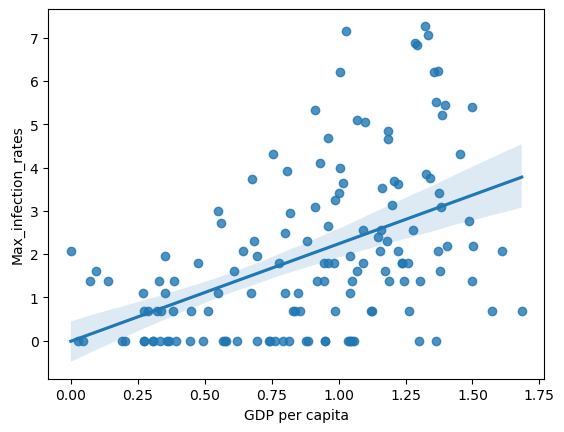

In [31]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

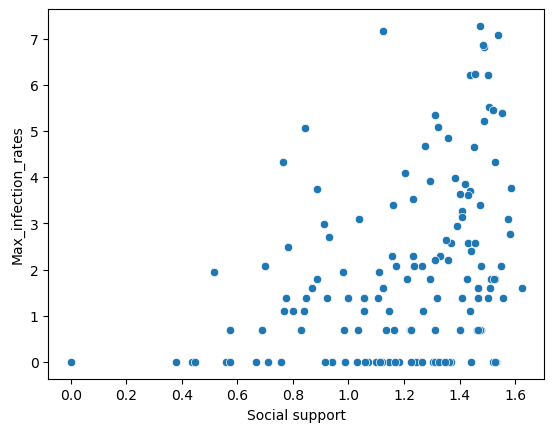

In [32]:
x = data["Social support"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

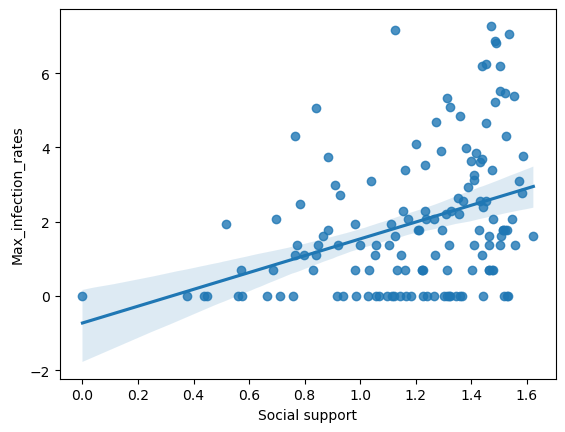

In [33]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

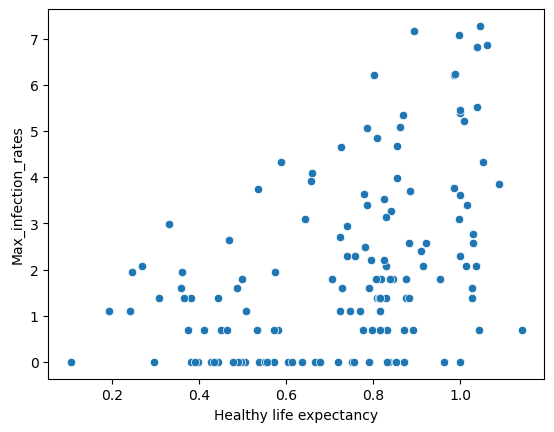

In [34]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

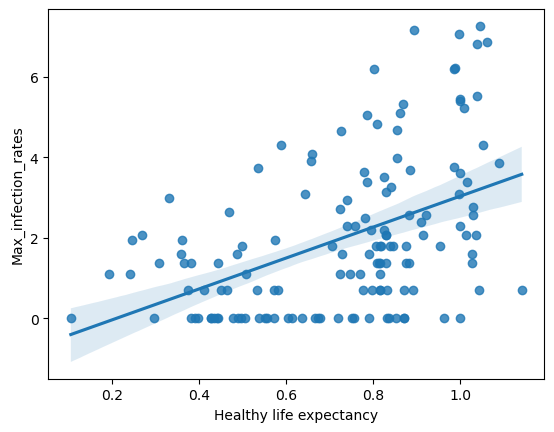

In [35]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

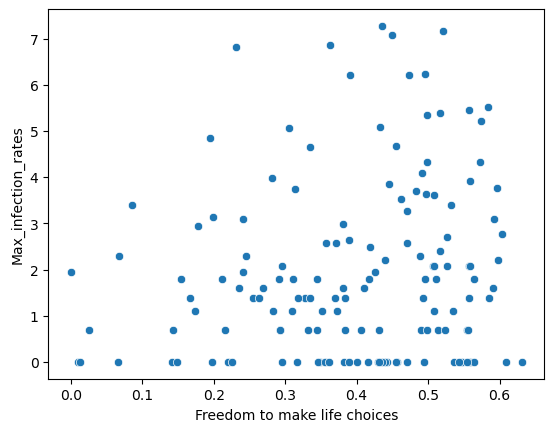

In [36]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

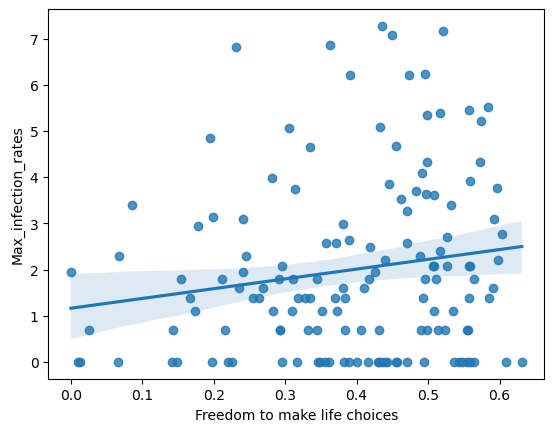

In [37]:
sns.regplot(x=x, y=np.log(y))

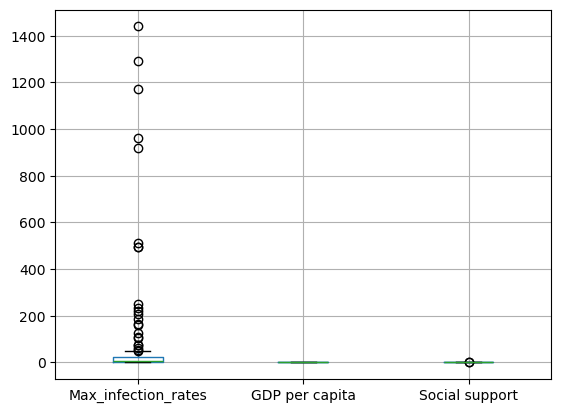

In [38]:
data.boxplot(["Max_infection_rates", "GDP per capita", "Social support"])
plt.show()

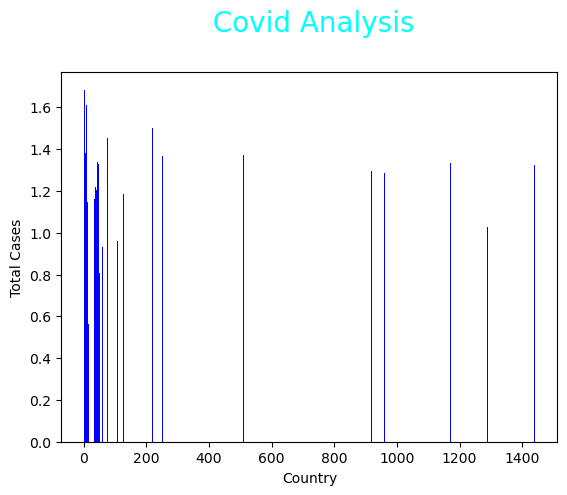

In [39]:

plt.bar(data["Max_infection_rates"], data["GDP per capita"], data["Social support"], color = "blue")

plt.title(" Covid Analysis\n", fontdict={'fontsize': 20, 'color': 'cyan'})
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()

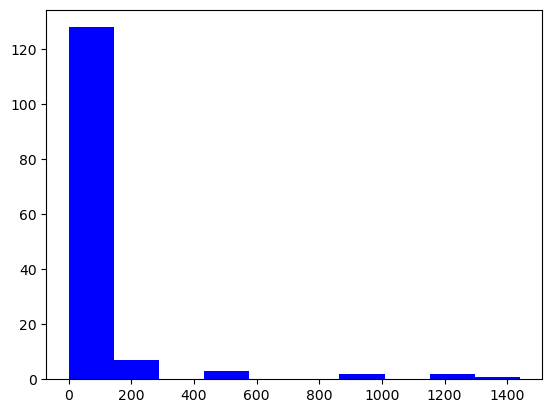

In [40]:
plt.hist(data["Max_infection_rates"], color = "blue")
plt.show()

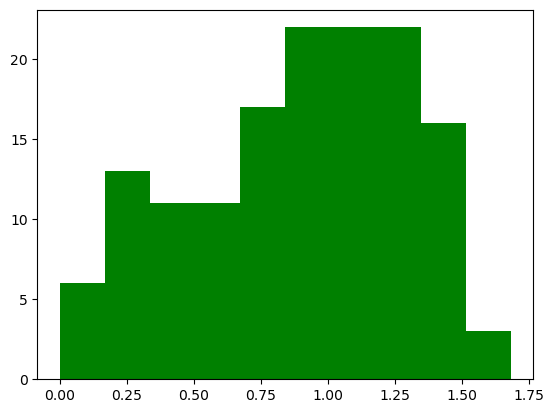

In [41]:
plt.hist(data["GDP per capita"], color = "green")
plt.show()

Text(0, 0.5, 'Total Cases')

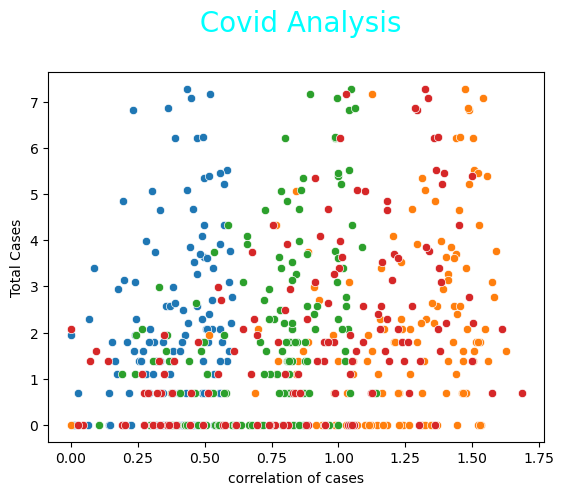

In [43]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

x = data["Social support"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

x = data["GDP per capita"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

plt.title(" Covid Analysis\n", fontdict={'fontsize': 20, 'color': 'cyan'})
plt.xlabel('correlation of cases')
plt.ylabel('Total Cases')



